In [1]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


Decision Tree Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



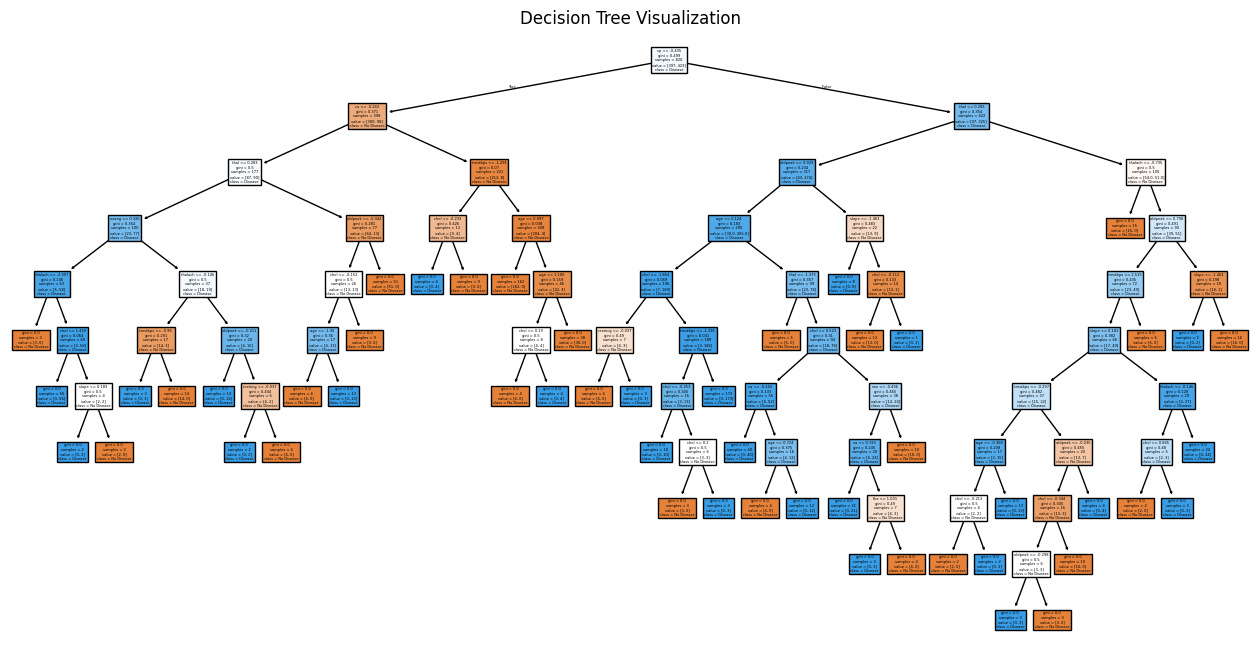

Pruned Tree Accuracy: 0.7804878048780488
Random Forest Accuracy: 0.9853658536585366
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



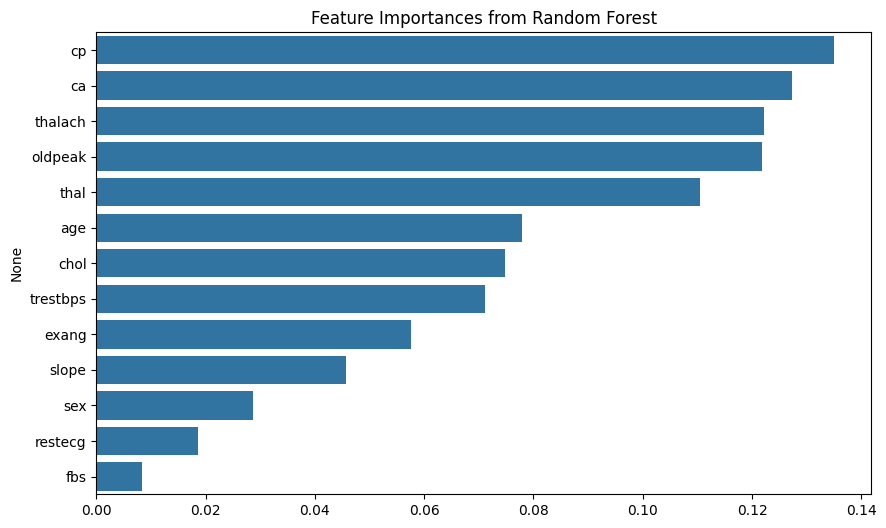

Decision Tree CV Accuracy: 1.0
Random Forest CV Accuracy: 0.9970731707317073


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (assuming heart.csv from Kaggle)
df = pd.read_csv("heart.csv")

# Split features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Train Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict & evaluate
y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# 2. Visualize Decision Tree
plt.figure(figsize=(16,8))
plot_tree(dt, feature_names=df.columns[:-1], class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# 3. Prevent Overfitting - limit max depth
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)
print("Pruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))

# 4. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# 5. Feature Importance
importances = rf.feature_importances_
features = df.columns[:-1]
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances from Random Forest")
plt.show()

# 6. Cross-validation
dt_cv_scores = cross_val_score(dt, X, y, cv=5)
rf_cv_scores = cross_val_score(rf, X, y, cv=5)

print("Decision Tree CV Accuracy:", np.mean(dt_cv_scores))
print("Random Forest CV Accuracy:", np.mean(rf_cv_scores))
